In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

df = pd.read_csv("./data/train.csv")
df_test = pd.read_csv("./data/test.csv")

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Text'])
y = df['Category']
X_test = vectorizer.transform(df_test['Text'])
y_test = df_test['Category']

label = ['entertainment', 'tech']

In [ ]:
# Task 2
# (b)
from sklearn.neighbors import KNeighborsClassifier

# Using k = 5 and Manhattan distance 
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=1)

# Fit 
knn.fit(X, y)


KNeighborsClassifier(p=1)

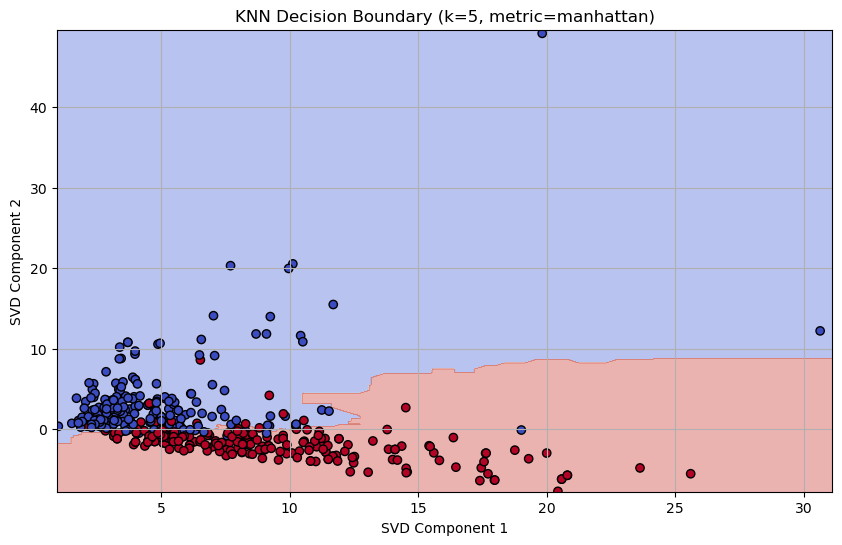

In [57]:
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D for visualization
svd = TruncatedSVD(n_components=2, random_state=42)
X_2d = svd.fit_transform(X)

# Define 2D grid over the projected data space
h = 0.05  # step size for grid
x_min, x_max = X_2d[:, 0].min() - h, X_2d[:, 0].max() + h*10
y_min, y_max = X_2d[:, 1].min() - h, X_2d[:, 1].max() + h*10

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

#Encode string labels into integers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Train kNN classifier using 2D features
knn.fit(X_2d, y_encoded)

# Predict labels over the grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)
# Plot decision surface and original data points
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)  # decision boundary
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_encoded, cmap=plt.cm.coolwarm, edgecolors='k')  # data points
plt.title("KNN Decision Boundary (k=5, metric=manhattan)")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.grid(True)
plt.show()

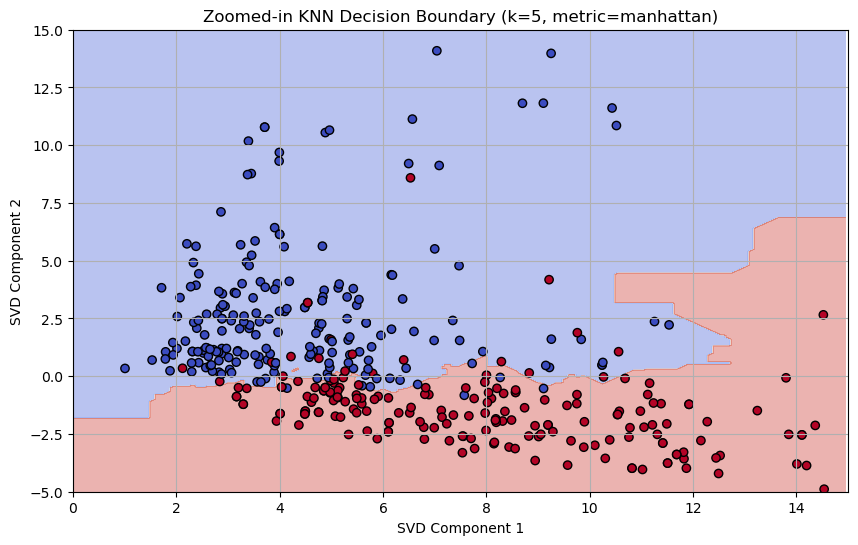

In [58]:
# Zoomed-in version: focus on region where most points cluster
x_min, x_max = 0, 15
y_min, y_max = -5, 15
h = 0.05

# Generate the grid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict class for each grid point
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(grid_points)
Z = Z.reshape(xx.shape)

# Plot zoomed-in decision surface
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_encoded, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Zoomed-in KNN Decision Boundary (k=5, metric=manhattan)")
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.grid(True)
plt.xlim(0, 15)
plt.ylim(-5, 15)

plt.show()
plt.show()

To visualize the decision boundary of my kNN classifier, we used SVD to reduce the high-dimensional text feature vectors to two components. The surface plot above shows the predicted class regions using k=5 and Manhattan distance.

The first surface plot shows the overall decision boundary. From this full view, we noticed that most data points are clustered within a small region, roughly between SVD component 1 = [0, 15] and component 2 = [0, 15]. To better analyze the boundary behavior in the most informative area, we generated a zoomed-in version focusing on that region.

In the zoomed-in plot, the decision boundary appears relatively smooth, with clear separation between the two classes. A smaller k (e.g., k=1) would create very jagged, overfitted boundaries that conform too closely to the training data. In contrast, a larger k would produce overly smoothed boundaries that might ignore local structure. 

We also observe that the Manhattan distance metric tends to produce more “boxy” decision boundaries. If we were to use Euclidean distance, the boundary would likely be smoother. 

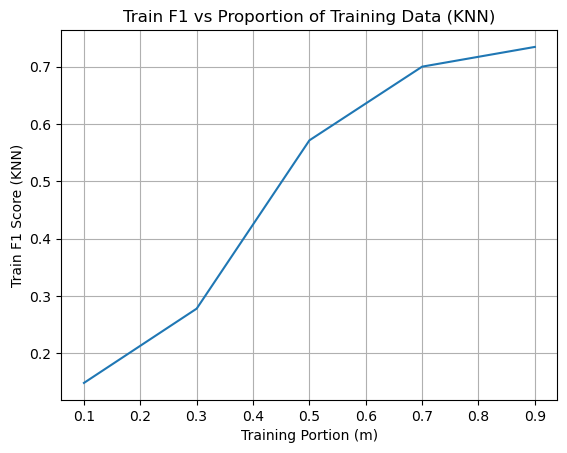

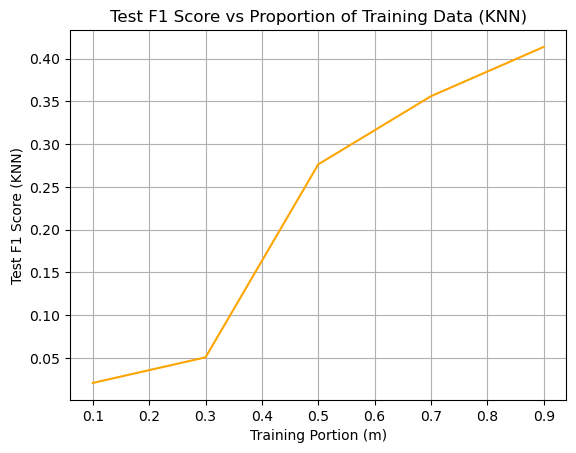

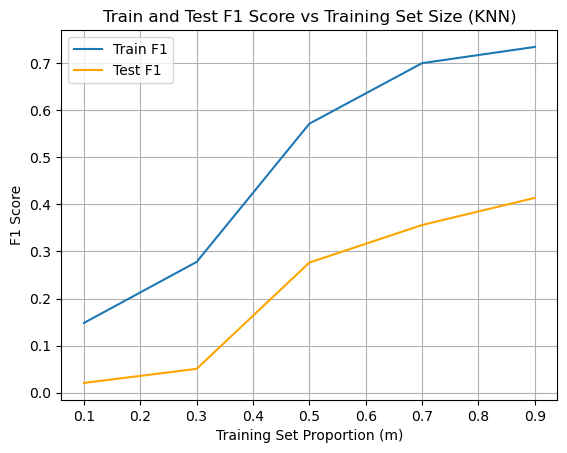

In [ ]:
# Task 3
# (a)
mlist = [0.1, 0.3, 0.5, 0.7, 0.9]
train_f1_score = []
test_f1_score = []

total_article = X.shape[0]

for m in mlist:
    m_size = int(m * total_article)
    X_train = X[:m_size]
    y_train = y[:m_size]
    X_test = X[m_size:]
    y_test = y[m_size:]

    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    f1_train = f1_score(y_train, y_train_pred, pos_label = label[1])
    train_f1_score.append(f1_train)

    y_test_pred = knn.predict(X_test)
    f1_test = f1_score(y_test, y_test_pred, pos_label = label[1])
    test_f1_score.append(f1_test)

plt.plot(mlist, train_f1_score)
plt.xlabel("Training Portion (m)")
plt.ylabel("Train F1 Score (KNN)")
plt.title("Train F1 vs Proportion of Training Data (KNN)")
plt.grid(True)
plt.show()

plt.plot(mlist, test_f1_score, color='orange')
plt.xlabel("Training Portion (m)")
plt.ylabel("Test F1 Score (KNN)")
plt.title("Test F1 Score vs Proportion of Training Data (KNN)")
plt.grid(True)
plt.show()

plt.plot(mlist, train_f1_score, label='Train F1')
plt.plot(mlist, test_f1_score, label='Test F1', color='orange')
plt.xlabel("Training Set Proportion (m)")
plt.ylabel("F1 Score")
plt.title("Train and Test F1 Score vs Training Set Size (KNN)")
plt.legend()
plt.grid(True)
plt.show()

As shown in the plot, both training and testing F1 scores increase as the proportion of training data (m) increases. The training F1 improves steadily, reaching over 0.7 when using 90% of the data, while the testing F1 also improves but remains significantly lower than the training F1 throughout.

This growing gap between training and testing performance suggests a degree of overfitting: the model fits the training data well but generalizes less effectively to unseen data, especially when the training set is small. However, the trend also indicates that more training data consistently leads to better generalization, as seen by the steady rise in test F1.

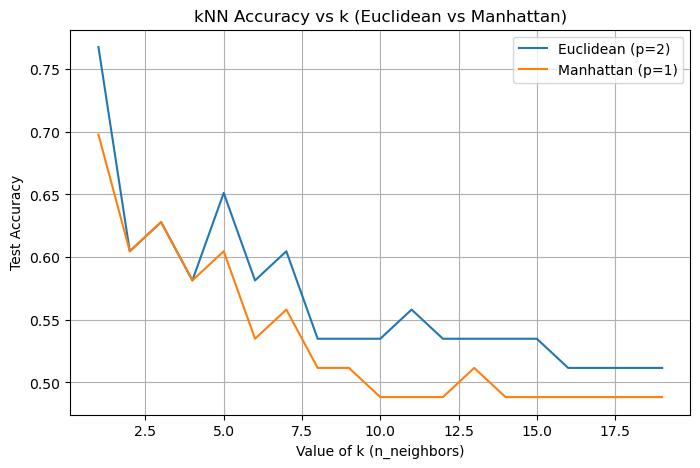

In [ ]:
# (b)
k_range = range(1, 20)
acc_euclidean = []
acc_manhattan = []

for k in k_range:

    knn_eu = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    knn_eu.fit(X_train, y_train)
    y_pred_eu = knn_eu.predict(X_test)
    acc_euclidean.append(accuracy_score(y_test, y_pred_eu))

    knn_man = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=1)
    knn_man.fit(X_train, y_train)
    y_pred_man = knn_man.predict(X_test)
    acc_manhattan.append(accuracy_score(y_test, y_pred_man))

plt.figure(figsize=(8,5))
plt.plot(k_range, acc_euclidean, label='Euclidean (p=2)')
plt.plot(k_range, acc_manhattan, label='Manhattan (p=1)')
plt.xlabel("Value of k (n_neighbors)")
plt.ylabel("Test Accuracy")
plt.title("kNN Accuracy vs k (Euclidean vs Manhattan)")
plt.legend()
plt.grid(True)
plt.show()

To assess the effect of hyperparameters on kNN, we evaluated the model using different values of k (from 1 to 19) with two distance metrics: Euclidean (p=2) and Manhattan (p=1). The results, as shown in the figure, indicate that the model achieves its highest accuracy when k=1, particularly with Euclidean distance.

Although the highest test accuracy is achieved when k=1 using Euclidean distance, such a low k value may cause the model to overfit the training data. This is because k=1 leads to highly localized decision boundaries that are sensitive to noise and outliers.

As k increases, the model becomes more stable and less sensitive to individual samples, but accuracy gradually decreases due to over-smoothing. A trade-off is observed: small k values (e.g., 3 to 5) tend to offer a better balance between capturing local structure and avoiding overfitting.

Overall, Euclidean distance performs consistently better than Manhattan distance in this task. A moderate k value such as 5 may offer the best compromise between accuracy and generalization.

In [ ]:
# (c)
best_k = 5
best_metric = 'euclidean'
knn = KNeighborsClassifier(n_neighbors=best_k, metric=best_metric)
knn.fit(X, y)
y_pred = knn.predict(X_test)
f1 = f1_score(y_test, y_pred, pos_label = label[1])
acc = accuracy_score(y_test, y_pred)

print(f"Test F1 Score: {f1:.4f}")
print(f"Test Accuracy: {acc:.4f}")

Test F1 Score: 0.5625
Test Accuracy: 0.6744


For the k-Nearest Neighbors (kNN) classifier, we evaluated multiple values of k and distance metrics to determine the best-performing configuration. Based on testing accuracy and F1 score, the highest test F1 was observed when using Euclidean distance (p=2) with a small value of k, particularly k=1. However, considering the risk of overfitting at k=1, we chose k=5 with Euclidean distance as the best trade-off between performance and generalization.

Using this setting (k=5, Euclidean), the model achieved a test F1 score of 0.5625 and accuracy of 0.6744. The decision boundary was relatively smooth, and the model was able to capture local structure in the data while avoiding overfitting. Compared to larger k values, this configuration maintained better class separation and more consistent predictions.